In [36]:
import pandas as pd

In [37]:
df = pd.read_csv(r"D:\HealthCare System\healthcare_dataset.csv")
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [38]:
# Check for duplicates in the dataset
print(f"Shape before dropping duplicates: {df.shape}")
duplicates = df.duplicated()
duplicates_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicates_count}")

Shape before dropping duplicates: (55500, 15)
Number of duplicate rows: 534


In [39]:
dropped_df = df.drop_duplicates()
print(f"Number of rows after dropping duplicates: {dropped_df.shape[0]}")
print(f"Number of columns after dropping duplicates: {dropped_df.shape[1]}")

Number of rows after dropping duplicates: 54966
Number of columns after dropping duplicates: 15


In [40]:
# Trim whitespaces and correct string case for all string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.title()

print("Whitespace trimmed and string case corrected for all string columns.")

Whitespace trimmed and string case corrected for all string columns.


In [41]:
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [42]:
df.replace([" ", "NA", "None", "Unknown", "?"], pd.NA, inplace=True)
df.isnull().sum()


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

## UNIVARIENT ANALYSIS

In [43]:
print(df.describe())

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


billing amount shows negative values...have to check for outliers

In [44]:
print(df['Admission Type'].value_counts())
print(df['Test Results'].value_counts())
print(df['Medical Condition'].value_counts())
print(df['Test Results'].value_counts())


Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


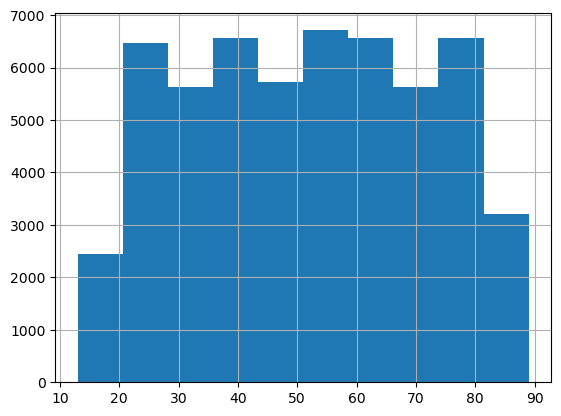

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical data
df['Age'].hist()
plt.show()

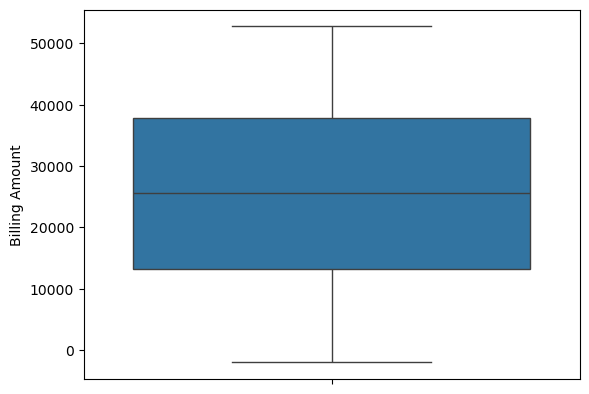

In [46]:
sns.boxplot(df['Billing Amount'])
plt.show()

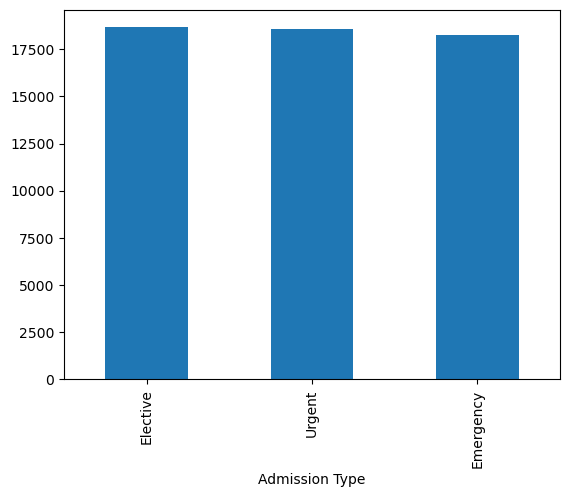

In [47]:
df['Admission Type'].value_counts().plot(kind='bar')
plt.show()

##  Bivariate Analysis

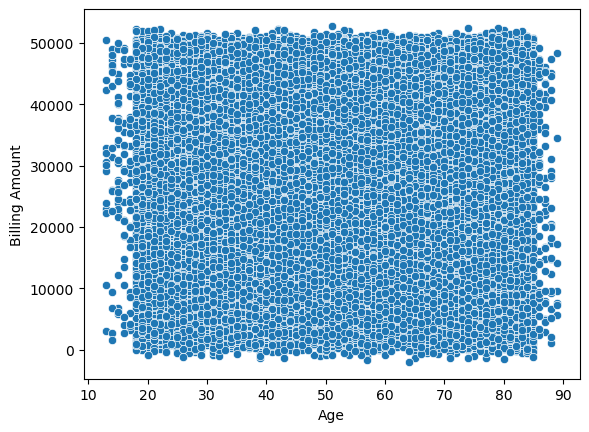

In [48]:
sns.scatterplot(x='Age', y='Billing Amount', data=df)
plt.show()

In [49]:
# Correlation
print(df[['Age', 'Billing Amount']].corr())

                     Age  Billing Amount
Age             1.000000       -0.003832
Billing Amount -0.003832        1.000000


“Correlation analysis shows no linear relationship between Age and Billing Amount, indicating that age is not a cost driver in this dataset.”

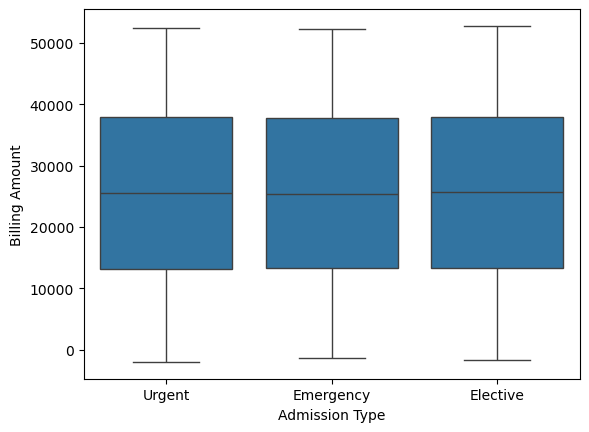

In [50]:
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)
plt.show()

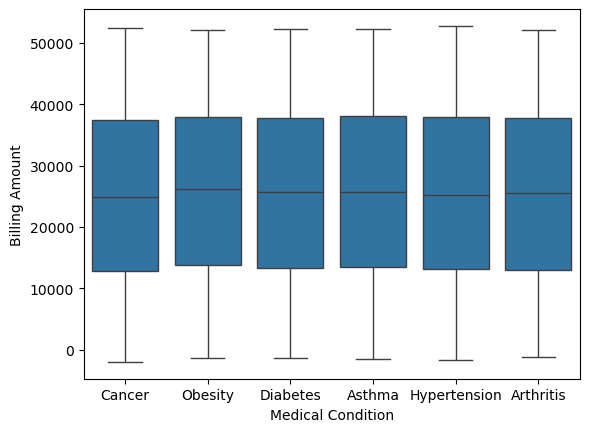

In [51]:
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.show()

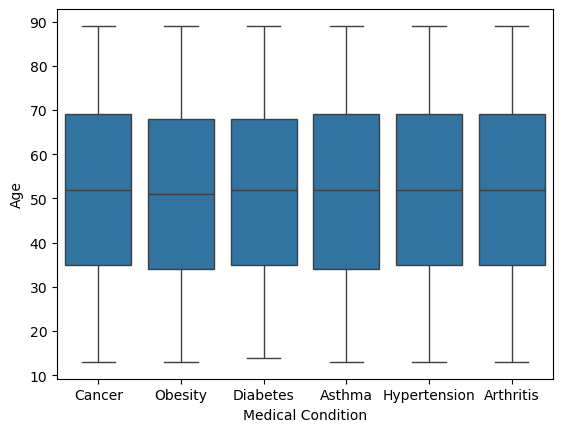

In [52]:
sns.boxplot(x='Medical Condition', y='Age', data=df)
plt.show()

In [53]:
# Crosstab
print(pd.crosstab(df['Medical Condition'], df['Test Results']))

Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis              3188          3088    3032
Asthma                 3009          3029    3147
Cancer                 3118          3060    3049
Diabetes               3168          3046    3090
Hypertension           3012          3091    3142
Obesity                3132          3042    3057


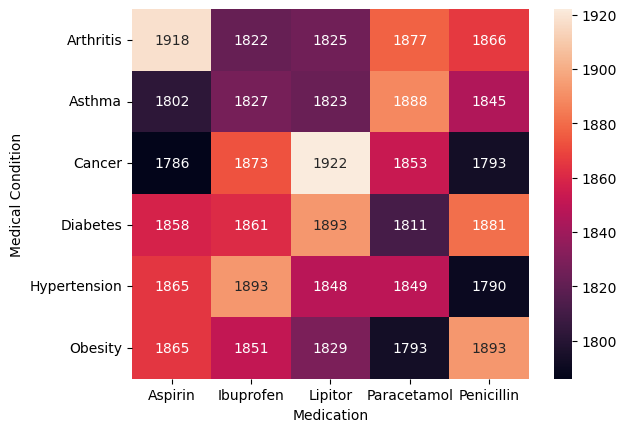

In [54]:
# Heatmap for visualization
sns.heatmap(pd.crosstab(df['Medical Condition'], df['Medication']), annot=True, fmt='d')
plt.show()

## - Lipitor and Paracetamol appear frequently across many conditions.
-##  Aspirin has high counts for arthritis and diabetes, but lower for cancer.


##  Multivariate Analysis

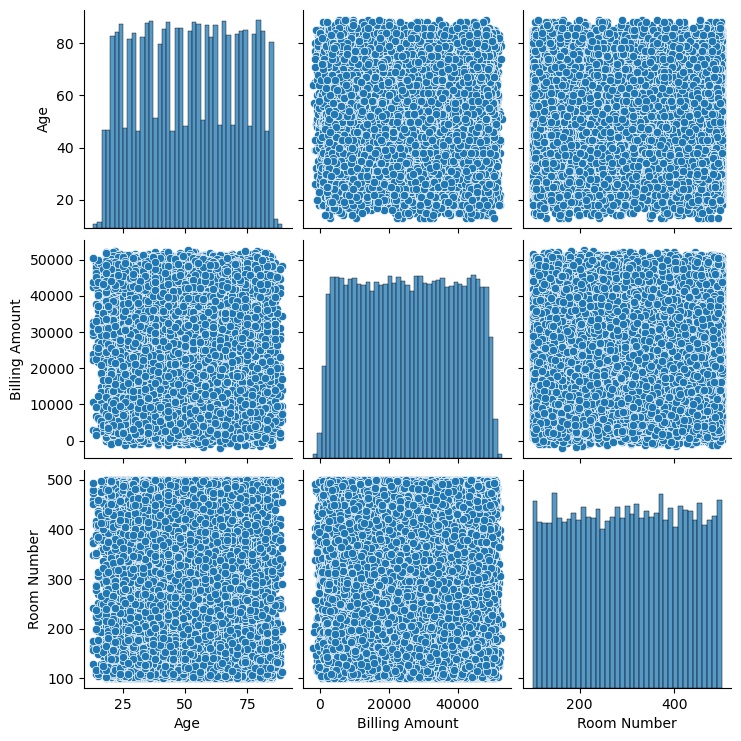

In [55]:
sns.pairplot(df)
plt.show()

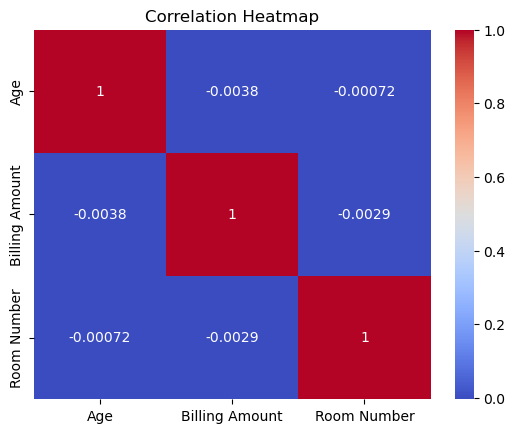

Admission Type  Medical Condition
Elective        Arthritis            25441.755239
                Asthma               25241.315150
                Cancer               25698.600839
                Diabetes             25983.136463
                Hypertension         25577.052691
                Obesity              25676.873933
Emergency       Arthritis            25515.028600
                Asthma               25878.321245
                Cancer               24862.485770
                Diabetes             25482.630367
                Hypertension         25420.369998
                Obesity              25814.618880
Urgent          Arthritis            25534.642267
                Asthma               25795.029337
                Cancer               24904.788274
                Diabetes             25457.478591
                Hypertension         25488.069212
                Obesity              25925.439155
Name: Billing Amount, dtype: float64


In [56]:
# Multivariate Analysis
# Heatmap for correlation among numerical features

numerical_df=df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Group analysis: Average Billing Amount by Admission Type and Medical Condition
avg_billing = df.groupby(['Admission Type', 'Medical Condition'])['Billing Amount'].mean()
print(avg_billing)



Calculating length of stay

In [57]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [58]:
# Decompose into Year and Month 
df['Admit_Year'] = df['Date of Admission'].dt.year
df['Admit_Month'] = df['Date of Admission'].dt.month

In [59]:
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [60]:
df=df[df['Length of Stay']>=0]  # Remove negative lengths of stay if any

Text(0.5, 1.0, 'Age Distribution')

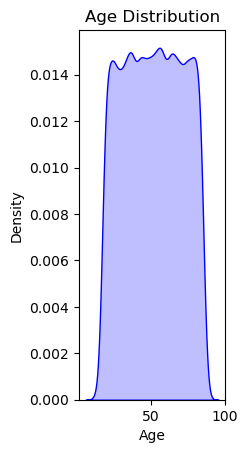

In [61]:
plt.subplot(1, 3, 1)
sns.kdeplot(df['Age'], fill=True, color="blue")
plt.title("Age Distribution")

C:\Users\harip\AppData\Local\Temp\ipykernel_30868\586417802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admit_Month', data=df, palette="viridis")


Text(0.5, 1.0, 'Admissions by Month (Seasonal Trend)')

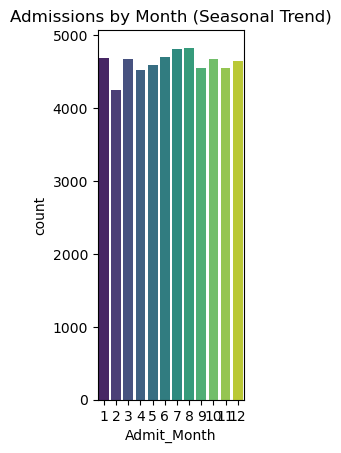

In [62]:
# 2. Seasonal Analysis: Using our Decomposed 'Admit_Month'
plt.subplot(1, 3, 2)
sns.countplot(x='Admit_Month', data=df, palette="viridis")
plt.title("Admissions by Month (Seasonal Trend)")

In [63]:
# Identify and remove outliers
df = df[(df['Age'] <= 110) & (df['Billing Amount'] > 0)]

## Dropping irrelevent columns to prevent overfitting

In [64]:
irrelevant_cols = ['Name', 'Doctor', 'Hospital', 'Room Number', 'Date of Admission', 'Discharge Date',]
df= df.drop(columns=irrelevant_cols)


## Billing amount cols are not uniform

In [65]:
df['Billing Amount'] = df['Billing Amount'].round(2)

## Feature engineering

In [66]:
import numpy as np
print("Creating Medical Vitals (BMI, BP, MAP)...")

# 1. Height & Weight logic (Based on Age/Gender)
df['Height_m'] = df['Gender'].apply(lambda x: np.random.normal(1.75, 0.07) if x == 'Male' else np.random.normal(1.62, 0.06))
df['BMI'] = np.random.normal(26, 5, size=len(df)) 
df['Weight_kg'] = df['BMI'] * (df['Height_m']**2)

# 2. Blood Pressure & MAP (S 2.3.3: Aggregate attributes)
df['Systolic_BP'] = 110 + (df['Age'] * 0.3) + np.random.normal(0, 5)
df['Diastolic_BP'] = 70 + (df['Age'] * 0.1) + np.random.normal(0, 3)
df['MAP'] = (df['Systolic_BP'] + 2 * df['Diastolic_BP']) / 3

# Round numbers to look clean
df = df.round({'BMI': 1, 'Weight_kg': 1, 'Height_m': 2, 'MAP': 1})
print("✅ BMI and MAP added successfully!")


Creating Medical Vitals (BMI, BP, MAP)...
✅ BMI and MAP added successfully!


## Synthetic vitals were generated for demonstration purposes

## One hot encoding

In [67]:

# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# cat_features=['Gender','Admission Type','Medical Condition','Medication','Insurance Provider','Blood Type']
# for col in cat_features:
#     df[col]=le.fit_transform(df[col])

categorical_cols = ['Gender','Admission Type','Medical Condition',
                    'Medication','Insurance Provider','Blood Type']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Categorical variables encoded successfully using One-Hot Encoding.")

Categorical variables encoded successfully using One-Hot Encoding.


In [68]:
df.to_csv(r"D:\HealthCare System\healthcare_master_clean_version2.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


In [ ]:
# df.to_csv(r"D:\HealthCare System\healthcare_master_clean.csv", index=False)
# print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


In [69]:
df['Test Results'].unique()


array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [34]:
df.head(10)

,Age,Billing Amount,Admit_Year,Admit_Month,Length of Stay,Height_m,BMI,Weight_kg,Systolic_BP,Diastolic_BP,...,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_Unitedhealthcare,Blood Type_A-,Blood Type_Ab+,Blood Type_Ab-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-
0,30,18856.28,2024,1,2,1.69,29.0,82.4,121.892126,77.851978,...,False,False,False,False,False,False,False,True,False,False
1,62,33643.33,2019,8,6,1.84,30.6,103.8,131.492126,81.051978,...,False,True,False,False,False,False,False,False,False,False
2,76,27955.10,2022,9,15,1.60,27.1,69.5,135.692126,82.451978,...,False,False,False,True,False,False,False,False,False,False
3,28,37909.78,2020,11,30,1.60,21.2,54.3,121.292126,77.651978,...,False,True,False,False,False,False,False,False,True,False
4,43,14238.32,2022,9,20,1.56,23.5,57.2,125.792126,79.151978,...,False,False,False,False,True,False,False,False,False,False
5,36,48145.11,2023,12,4,1.72,20.7,61.2,123.692126,78.451978,...,False,False,True,False,False,False,False,False,False,False
6,21,19580.87,2020,11,12,1.73,28.5,85.6,119.192126,76.951978,...,False,True,False,False,False,True,False,False,False,False
7,20,45820.46,2021,12,10,1.67,23.0,64.4,118.892126,76.851978,...,True,False,False,False,False,False,False,False,False,False
8,82,50119.22,2020,7,13,1.60,31.6,81.3,137.492126,83.051978,...,True,False,False,False,True,False,False,False,False,False
9,58,19784.63,2021,5,30,1.56,32.7,80.0,130.292126,80.651978,...,False,False,True,False,False,True,False,False,False,False


## MODULE 2 - CLINICAL NOTES
Goal: GenAI / BioBERT

In [5]:
import pandas as pd
import re
def preprocess_clinical_notes (): 
    df=pd.read_csv(r"D:\HealthCare System\clinical_records_10k.csv")    
    
    df=df.dropna(subset=['clinical_notes'])
    df=df.drop(columns=['patient_id'])
    df['clinical_notes']=df['clinical_notes'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    df['clinical_notes']=df['clinical_notes'].str.lower().str.strip()  
  
    return df

clinical_df=preprocess_clinical_notes()
print(clinical_df.head(10))

                                      clinical_notes
0  patient presents with chest pain history of hy...
1  followup for type 2 diabetes reports worsening...
2  routine review type 2 diabetes appears stable ...
3  routine review atrial fibrillation appears sta...
4  followup for type 2 diabetes reports worsening...
5  followup for type 2 diabetes reports worsening...
6  patient presents with dizziness history of typ...
7  patient presents with chronic cough history of...
8  routine review hypertension appears stable wit...
9  emergency admission for dizziness vital signs ...


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


c:\Users\harip\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Tokenize

In [7]:
tokenizer = Tokenizer(num_words=2000, oov_token="<OOV>")
tokenizer.fit_on_texts(clinical_df['clinical_notes'])
sequences = tokenizer.texts_to_sequences(clinical_df['clinical_notes'])

## Pad sequences

In [8]:
max_len=100
x=pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [10]:
clinical_df.to_csv(r"D:\HealthCare System\clinical_cleaned.csv", index=False)

## Module 3 
## Cleaning Radiology Images (PneumoniaMNIST)

## What is Pneumonia?¶
Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.

In [48]:
import numpy as np

data = np.load("D:\HealthCare System\pneumoniamnist.npz")
print(data.files)
print(data['train_images'].shape)
print(data['train_labels'].shape)


['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']
(3882, 28, 28)
(3882, 1)


In [49]:
np.unique(data['train_labels'], return_counts=True)

(array([0, 1], dtype=uint8), array([ 388, 3494]))

- 388 images are labeled 0 (Normal)
- 3494 images are labeled 1 (Pneumonia)
So the data is highly imbalanced

## Extract the arrays

In [50]:
train_images = data['train_images']#original data
train_labels = data['train_labels']

val_images = data['val_images']
val_labels = data['val_labels']

test_images = data['test_images']
test_labels = data['test_labels']   

##  Normalize pixel values (0–1)

In [51]:
train_images = train_images.astype('float32') / 255.0 #Preprocessed data
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

## Add a channel dimension as CNN expects- (batch, channels, height, width)


In [56]:
train_images = np.expand_dims(train_images, axis=1)
val_images = np.expand_dims(val_images, axis=1)
test_images = np.expand_dims(test_images, axis=1)



##  Convert labels to 1D - Flattening

In [59]:
train_images = train_images.reshape(-1, 1, 28, 28)
val_images   = val_images.reshape(-1, 1, 28, 28)
test_images  = test_images.reshape(-1, 1, 28, 28)

train_labels = train_labels.reshape(-1)
val_labels   = val_labels.reshape(-1)
test_labels  = test_labels.reshape(-1)


print(train_images.shape, train_labels.shape)
print(val_images.shape, val_labels.shape)
print(test_images.shape, test_labels.shape)

(3882, 1, 28, 28) (3882,)
(524, 1, 28, 28) (524,)
(624, 1, 28, 28) (624,)


##  Augment minority class (Normal)


In [60]:
#Separate class 0 (Normal) and class 1 (Pneumonia)
normal_images=train_images[train_labels==0]
pneumonia_images=train_images[train_labels==1]

In [119]:
def make_augmented_image(image):
    img = image[0]
    
    # Calculate the center dynamically
    center = (img.shape[1] // 2, img.shape[0] // 2)

    # Small random rotation
    angle = random.randint(-5, 5) # Reduced angle for less distortion
    M = cv2.getRotationMatrix2D(center, angle, 1)
    img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

    # Horizontal/vertical flip
    if random.random() > 0.5:
        img = cv2.flip(img, 1)

    # Brightness adjustment with clamping
    brightness = random.uniform(0.95, 1.05)  # Narrower range for better clarity
    img = img * brightness
    img = np.clip(img, 0, 1)

    return img.reshape(1, img.shape[0], img.shape[1])

## Calculate how many new images we need


In [120]:
num_normal=len(normal_images)
num_pneumonia=len(pneumonia_images)
needed=num_pneumonia - num_normal
print(f"Number of augmented images needed: {needed}")


Number of augmented images needed: 3106


## Create augmented images for class 0


In [121]:
augmented_images=[]
for i in range(needed):
   original_image=normal_images[i % num_normal]
   new_img=make_augmented_image(original_image)
   augmented_images.append(new_img)
augmented_images=np.array(augmented_images)



In [122]:
print(new_img.shape)

(1, 28, 28)


## Combine original + augmented images


In [123]:
final_images = np.concatenate([pneumonia_images, normal_images, augmented_images], axis=0)

final_labels = np.concatenate([
    np.ones(len(pneumonia_images)),      # label 1
    np.zeros(len(normal_images)),        # label 0
    np.zeros(len(augmented_images))      # label 0 (augmented)
])

print(final_images.shape, final_labels.shape)

(6988, 1, 28, 28) (6988,)


## Shuffle the final dataset


In [124]:
indices = np.random.permutation(len(final_images))

final_images = final_images[indices]
final_labels = final_labels[indices]


## Save the balanced dataset

In [125]:

np.savez(r"D:\HealthCare System\pneumoniamnist_balanced.npz",
         images=final_images,
         labels=final_labels, #new balanced training images and labels
         val_images=data["val_images"],  # unchanged
         val_labels=data["val_labels"],  # unchanged
         test_images=data["test_images"],# unchanged
         test_labels=data["test_labels"] # unchanged
)


In [126]:
check = np.load("pneumoniamnist_balanced.npz")
print(check["images"].shape)
print(check["labels"].shape)


(6988, 1, 28, 28)
(6988,)


## EDA for images


In [127]:
import matplotlib.pyplot as plt
import numpy as np
print(f"final image shape:{final_images.shape}")
print(f"final label shape:{final_labels.shape}")

final image shape:(6988, 1, 28, 28)
final label shape:(6988,)


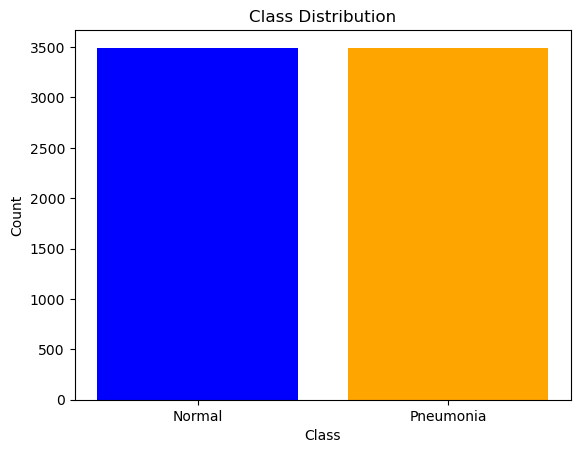

In [128]:
# 2. Class distribution
unique, counts = np.unique(final_labels, return_counts=True)
plt.bar(unique, counts, color=['blue', 'orange'])
plt.xticks([0, 1], ['Normal', 'Pneumonia'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

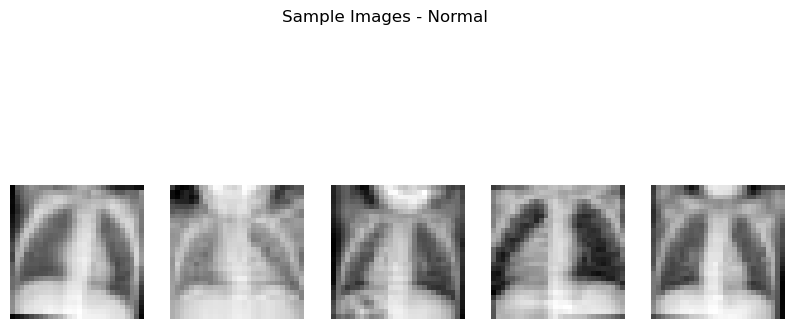

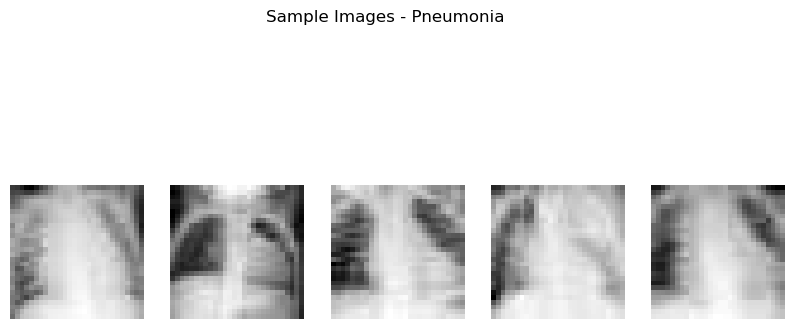

In [129]:
# 3. Visualize random images from each class
def plot_sample_images(images, labels, class_label, num_samples=5):
    plt.figure(figsize=(10, 5))
    class_images = images[labels == class_label]
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(class_images[i][0], cmap='gray')  # Assuming grayscale images
        plt.axis('off')
    plt.suptitle(f"Sample Images - {'Normal' if class_label == 0 else 'Pneumonia'}")
    plt.show()

plot_sample_images(final_images, final_labels, class_label=0)  # Normal
plot_sample_images(final_images, final_labels, class_label=1)  # Pneumonia

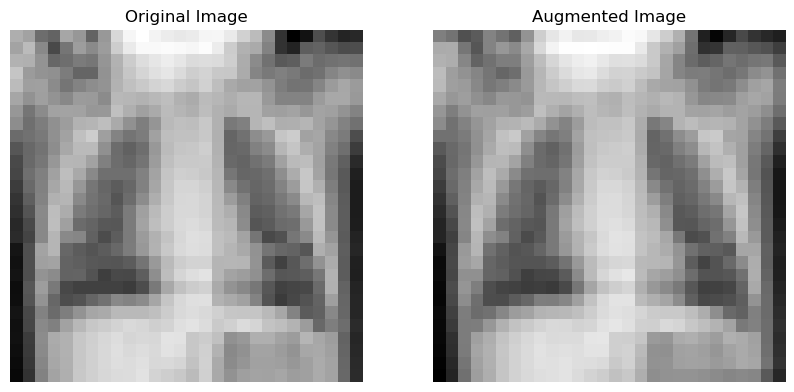

In [130]:
# 5. Compare original and augmented images

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(normal_images[0][0], cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[0][0], cmap='gray')
plt.title("Augmented Image")
plt.axis('off')
plt.show()

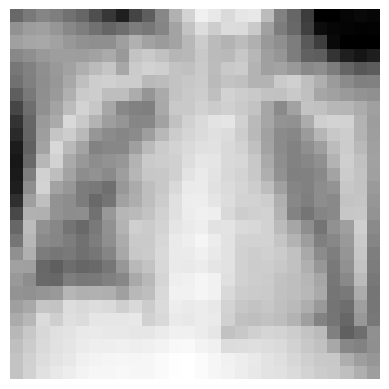

In [135]:
plt.imshow(data["train_images"][0], cmap='gray')
plt.axis('off')
plt.show()





In [134]:
print(data["train_images"].shape)


(3882, 28, 28)


In [136]:
#pixel value range
print(final_images.min(), final_images.max()) 

0.0 1.0


In [ ]:
#- Check label counts
unique, counts = np.unique(final_labels, return_counts=True)
print(dict(zip(unique, counts)))


{np.float64(0.0): np.int64(3494), np.float64(1.0): np.int64(3494)}


In [138]:
print("Mean:", final_images.mean())
print("Std Dev:", final_images.std())


Mean: 0.5584072
Std Dev: 0.17587726


- Low std dev (<0.1) → images look flat, low contrast
- High std dev (>0.3) → images have strong contrast
0.17 means - moderate contrast

A mean of 0.55 means:
not too dark or not too bright 

In [139]:
blank_count = np.sum([np.all(img == 0) for img in final_images])
print("Blank images:", blank_count)


Blank images: 0


## Module 4
### Human vital signs for RNN/LSTM - Cleaning

In [141]:
df_vital=pd.read_csv(r"human_vital_signs_dataset_2024.csv")
df_vital.head(10)

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk
5,6,79,12,2024-07-19 21:48:45.729841,36.884979,95.987129,130,70,22,Male,79.869933,1.922334,0.103963,60,21.613533,90.000000,Low Risk
6,7,81,17,2024-07-19 21:47:45.729841,37.273640,99.456716,118,84,43,Male,57.846565,1.831484,0.055885,34,17.245326,95.333333,High Risk
7,8,96,15,2024-07-19 21:46:45.729841,36.852633,97.124125,135,77,72,Female,71.758972,1.603888,0.073413,58,27.895118,96.333333,High Risk
8,9,83,12,2024-07-19 21:45:45.729841,36.044191,98.584497,111,84,50,Male,79.295332,1.672735,0.098520,27,28.339570,93.000000,Low Risk
9,10,66,15,2024-07-19 21:44:45.729841,36.957178,97.916267,131,77,61,Male,53.923400,1.896381,0.081364,54,14.994299,95.000000,High Risk


In [143]:
df_vital.nunique()

Patient ID                  200020
Heart Rate                      40
Respiratory Rate                 8
Timestamp                   200020
Body Temperature            200020
Oxygen Saturation           200020
Systolic Blood Pressure         30
Diastolic Blood Pressure        20
Age                             72
Gender                           2
Weight (kg)                 200020
Height (m)                  200020
Derived_HRV                 200020
Derived_Pulse_Pressure          49
Derived_BMI                 200020
Derived_MAP                     87
Risk Category                    2
dtype: int64

In [145]:
df_vital.describe()

,Patient ID,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP
count,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000
mean,100010.500000,79.533747,15.489451,36.748353,97.504372,124.437971,79.499625,53.446275,74.996419,1.750031,0.099970,44.938346,25.003625,94.479074
std,57740.944759,11.552894,2.294472,0.433290,1.442598,8.656946,5.757248,20.786802,14.471502,0.144554,0.028861,10.404945,6.447143,4.797891
min,1.000000,60.000000,12.000000,36.000004,95.000007,110.000000,70.000000,18.000000,50.000156,1.500001,0.050000,21.000000,12.505974,83.333333
25%,50005.750000,70.000000,13.000000,36.372613,96.256859,117.000000,75.000000,35.000000,62.423615,1.624777,0.074955,37.000000,20.134367,91.000000
50%,100010.500000,80.000000,15.000000,36.747741,97.509629,124.000000,79.000000,53.000000,74.977169,1.750478,0.099988,45.000000,24.320776,94.333333
75%,150015.250000,90.000000,17.000000,37.123003,98.755722,132.000000,84.000000,71.000000,87.539510,1.875310,0.124917,53.000000,29.187169,98.000000
max,200020.000000,99.000000,19.000000,37.499992,99.999963,139.000000,89.000000,89.000000,99.999765,1.999997,0.149999,69.000000,44.376487,105.666667


In [146]:
df_vital.isnull().sum()

Patient ID                  0
Heart Rate                  0
Respiratory Rate            0
Timestamp                   0
Body Temperature            0
Oxygen Saturation           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Derived_HRV                 0
Derived_Pulse_Pressure      0
Derived_BMI                 0
Derived_MAP                 0
Risk Category               0
dtype: int64

In [153]:
df_vital.duplicated().sum()

np.int64(0)

In [147]:
df_vital.dtypes

Patient ID                    int64
Heart Rate                    int64
Respiratory Rate              int64
Timestamp                    object
Body Temperature            float64
Oxygen Saturation           float64
Systolic Blood Pressure       int64
Diastolic Blood Pressure      int64
Age                           int64
Gender                       object
Weight (kg)                 float64
Height (m)                  float64
Derived_HRV                 float64
Derived_Pulse_Pressure        int64
Derived_BMI                 float64
Derived_MAP                 float64
Risk Category                object
dtype: object

In [149]:
df_vital.value_counts()

Patient ID  Heart Rate  Respiratory Rate  Timestamp                   Body Temperature  Oxygen Saturation  Systolic Blood Pressure  Diastolic Blood Pressure  Age  Gender  Weight (kg)  Height (m)  Derived_HRV  Derived_Pulse_Pressure  Derived_BMI  Derived_MAP  Risk Category
200020      69          14                2024-03-03 00:14:46.246950  37.012931         99.523058          133                      78                        67   Female  91.442825    1.853322    0.096521     55                      26.622442    96.333333    Low Risk         1
1           60          12                2024-07-19 21:53:45.729841  36.861707         95.702046          124                      86                        37   Female  91.541618    1.679351    0.121033     38                      32.459031    98.666667    High Risk        1
2           63          18                2024-07-19 21:52:45.729841  36.511633         96.689413          126                      84                        77   Male    

## Class imbalance for target variable - risk category

C:\Users\harip\AppData\Local\Temp\ipykernel_41024\411796021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk Category', data=df_vital, palette='Set2')


<Axes: xlabel='Risk Category', ylabel='count'>

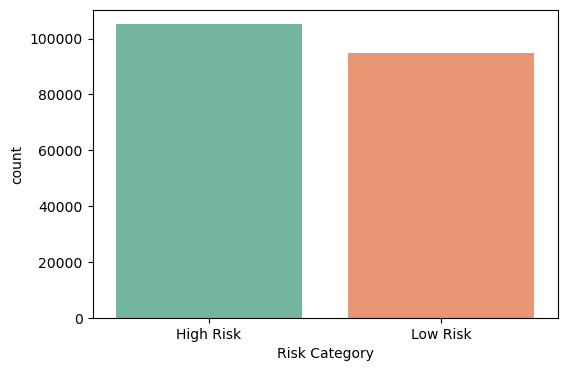

In [152]:
df_vital['Risk Category'].value_counts()
plt.figure(figsize=(6,4))
sns.countplot(x='Risk Category', data=df_vital, palette='Set2')


In [151]:
df_vital['Risk Category'].value_counts(normalize=True) * 100


Risk Category
High Risk    52.552245
Low Risk     47.447755
Name: proportion, dtype: float64

<Axes: >

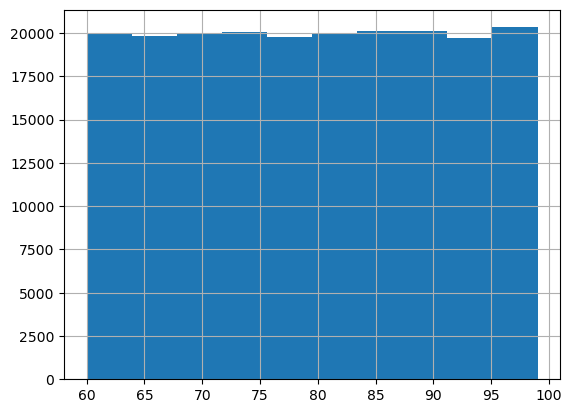

In [154]:
df_vital['Heart Rate'].hist()


<Axes: xlabel='Systolic Blood Pressure'>

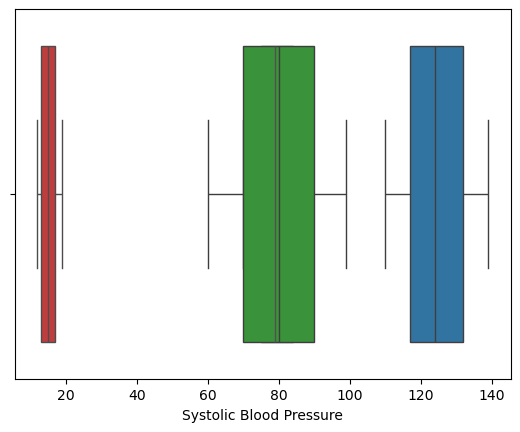

In [155]:
sns.boxplot(x=df_vital['Systolic Blood Pressure'])
sns.boxplot(x=df_vital['Diastolic Blood Pressure'])
sns.boxplot(x=df_vital['Heart Rate'])
sns.boxplot(x=df_vital['Respiratory Rate'])


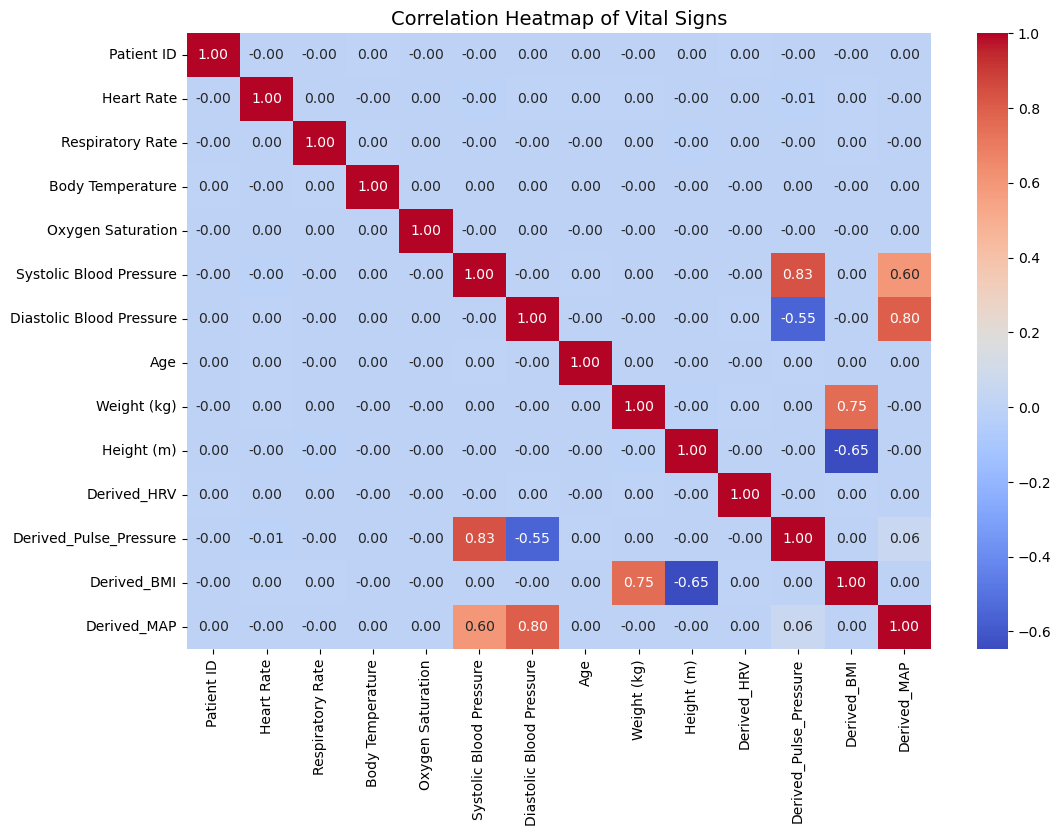

In [162]:
# Select only numeric columns for correlation
numeric_df = df_vital.select_dtypes(include=['number'])

# Increase figure size for better clarity
plt.figure(figsize=(12, 8))

# Generate heatmap with improved settings
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 10})

# Add title for better context
plt.title("Correlation Heatmap of Vital Signs", fontsize=14)

# Display the heatmap
plt.show()

## weight , height(BMI already capturing these ),pulse pressure,dialostic BP can be dropped to avoid redundancy - seems there are duplicates of others 

In [157]:
df_vital['Patient ID'].value_counts()


Patient ID
200020    1
1         1
2         1
3         1
4         1
         ..
24        1
25        1
26        1
27        1
28        1
Name: count, Length: 200020, dtype: int64

In [159]:
print(df_vital.columns)

Index(['Patient ID', 'Heart Rate', 'Respiratory Rate', 'Timestamp',
       'Body Temperature', 'Oxygen Saturation', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Age', 'Gender', 'Weight (kg)',
       'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI',
       'Derived_MAP', 'Risk Category'],
      dtype='object')


<Figure size 1200x600 with 0 Axes>

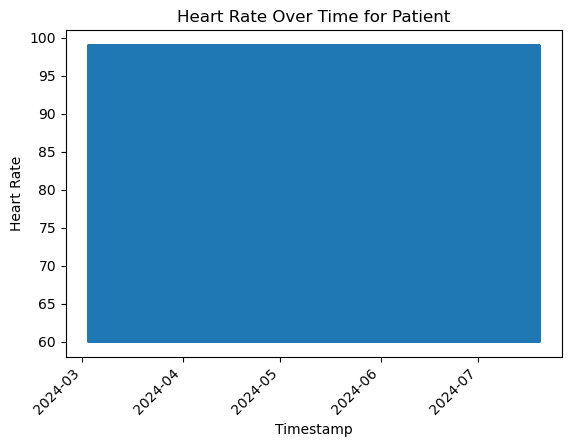

In [163]:
# Convert Timestamp to datetime if not already done
df_vital['Timestamp'] = pd.to_datetime(df_vital['Timestamp'])

# Plot Heart Rate over time for a specific patient
pids = df_vital['Patient ID'].iloc[::1]
plt.figure(figsize=(12, 6))
df_vital[df_vital['Patient ID'] == pids].plot(x='Timestamp', y='Heart Rate', legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate")
plt.title("Heart Rate Over Time for Patient")

plt.show()

In [164]:
df_vital['Timestamp'].diff().value_counts()


Timestamp
-1 days +23:59:00           199517
-1 days +23:59:00.001000       170
-1 days +23:59:00.001001        72
-1 days +23:59:00.000999        49
-1 days +23:59:00.000998        30
                             ...  
-1 days +23:59:00.000925         1
-1 days +23:59:00.001074         1
-1 days +23:59:00.001140         1
-1 days +23:59:00.000984         1
-1 days +23:59:00.000992         1
Name: count, Length: 81, dtype: int64

## vitals between High‑Risk vs Low‑Risk

<Axes: xlabel='Risk Category', ylabel='Heart Rate'>

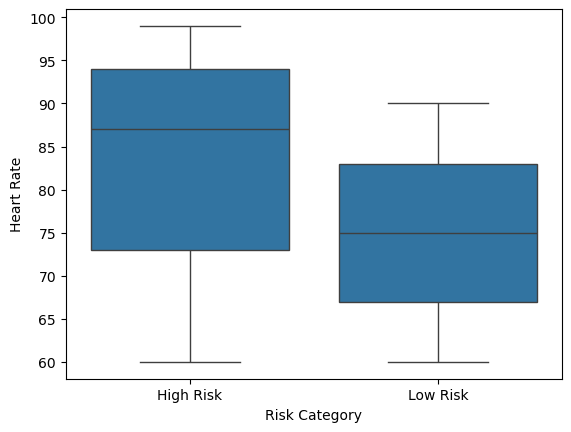

In [165]:
sns.boxplot(x='Risk Category', y='Heart Rate', data=df_vital)


##  how many patients are High Risk vs Low Risk.

In [173]:

#cat_df = df_vital.select_dtypes(include=['object'])
#cat_df.groupby('Risk Category').mean()
numeric_cols=df_vital.select_dtypes(include=['int64','float64']).columns
df_vital.groupby('Risk Category')[numeric_cols].mean()


,Patient ID,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP
Risk Category,,,,,,,,,,,,,,
High Risk,99910.210617,83.578795,15.486591,36.748839,97.503478,124.408905,79.519355,53.494982,75.335267,1.737472,0.099929,44.889550,25.933353,94.482538
Low Risk,100121.578642,75.053527,15.492619,36.747814,97.505363,124.470165,79.477773,53.392329,74.621117,1.763941,0.100017,44.992392,23.973876,94.475237


# heart rate and bmi seems to be strong predictors - Others are seems to be same 

<Axes: >

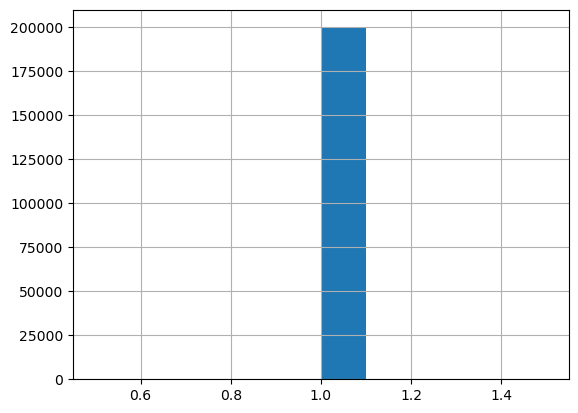

In [172]:
df_vital.groupby('Patient ID').size().hist()


## how many males vs females fall into each risk category.

<Axes: xlabel='Gender', ylabel='count'>

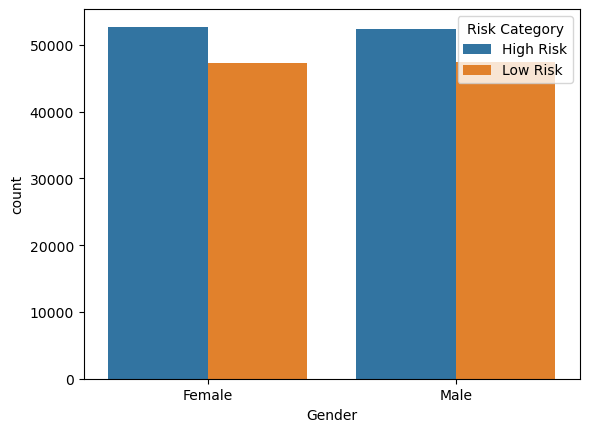

In [174]:
sns.countplot(x='Gender', hue='Risk Category', data=df_vital)


## full stats (mean, std, min, max) for each numeric column per class.

In [175]:
df_vital.groupby('Risk Category').describe()


Patient ID                                                   \
                   count           mean  min      25%       50%       75%   
Risk Category                                                               
High Risk       105115.0   99910.210617  1.0  50048.5   99824.0  149889.0   
Low Risk         94905.0  100121.578642  3.0  49950.0  100215.0  150162.0   

                                      Heart Rate             ... Derived_BMI  \
                    max           std      count       mean  ...         max   
Risk Category                                                ...               
High Risk      200019.0  57689.272305   105115.0  83.578795  ...   44.376487   
Low Risk       200020.0  57798.223138    94905.0  75.053527  ...   29.999959   

                        Derived_MAP                                         \
                    std       count       mean        min   25%        50%   
Risk Category                                                                
High Risk      8.275155    105115.0  94.482538  83.333333  91.0  94.333333   
Low Risk       3.120971     94905.0  94.475237  83.333333  91.0  94.333333   

                                           
                75%         max       std  
Risk Category                              
High Risk      98.0  105.666667  4.789443  
Low Risk       98.0  105.666667  4.807252  

[2 rows x 120 columns]

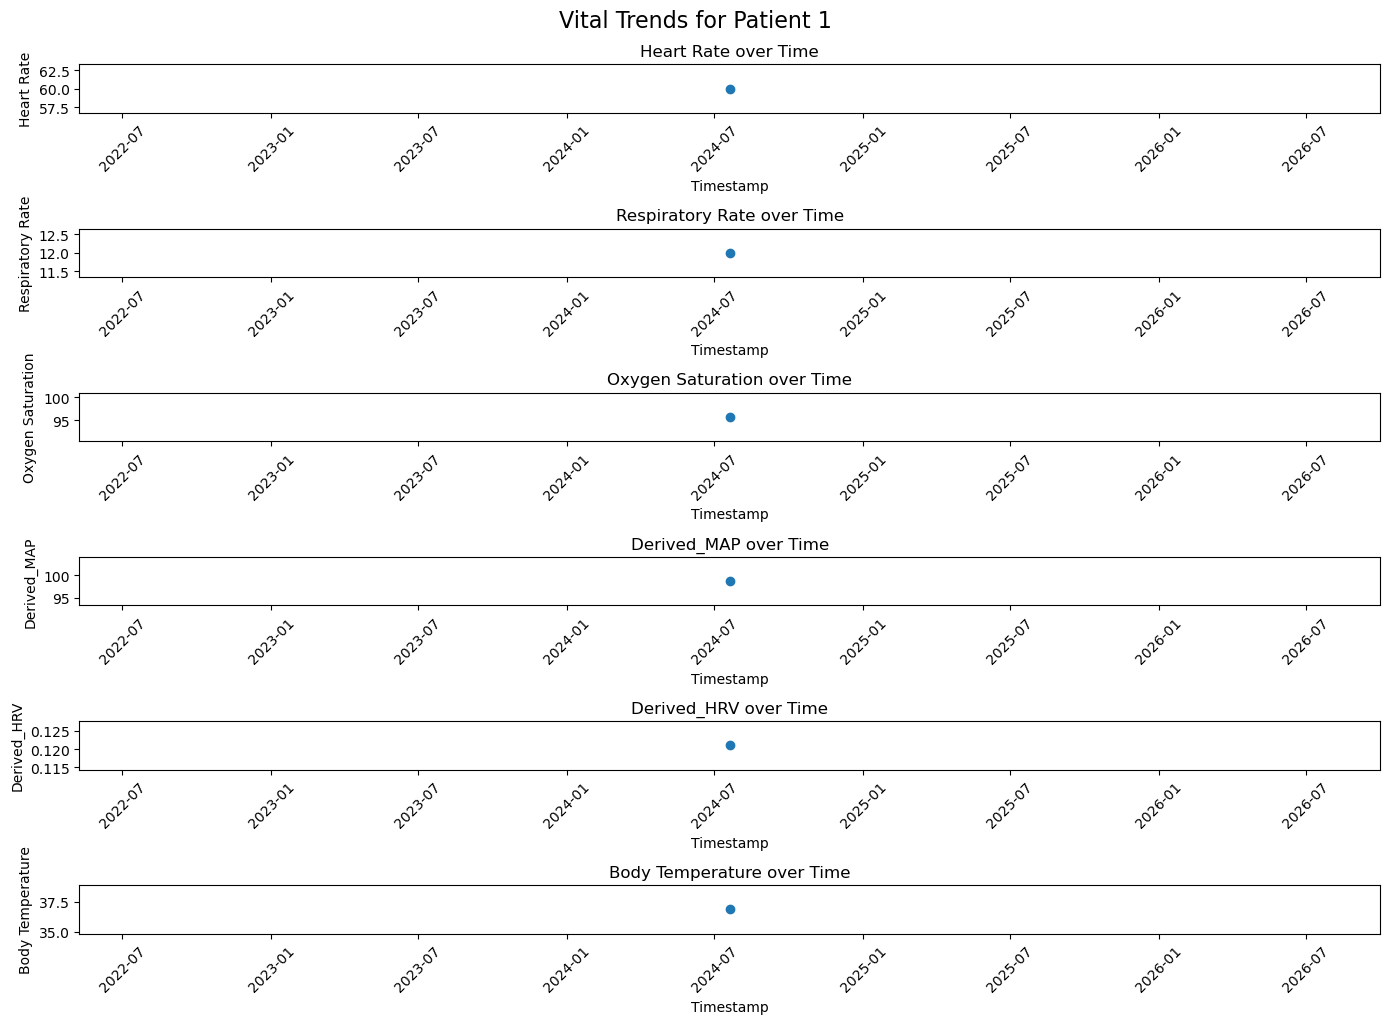

In [178]:
import matplotlib.pyplot as plt

# Convert Timestamp to datetime (if not already done)
df_vital['Timestamp'] = pd.to_datetime(df_vital['Timestamp'])

# Choose one patient ID
pid = df_vital['Patient ID'].iloc[0]  

# Filter data for that patient
patient_df = df_vital[df_vital['Patient ID'] == pid]

# List of vitals to plot
vitals = ['Heart Rate', 'Respiratory Rate', 'Oxygen Saturation', 
          'Derived_MAP', 'Derived_HRV', 'Body Temperature']

# Create subplots
plt.figure(figsize=(14, 10))
for i, vital in enumerate(vitals, 1):
    plt.subplot(len(vitals), 1, i)
    plt.plot(patient_df['Timestamp'], patient_df[vital], marker='o')
    plt.title(f'{vital} over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(vital)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle(f'Vital Trends for Patient {pid}', fontsize=16, y=1.02)
plt.show()


## checking gap in time series

In [179]:
df_vital=df_vital.sort_values(['Patient ID', 'Timestamp'])
df_vital['time_diff'] = df_vital.groupby('Patient ID')['Timestamp'].diff()
df_vital[['Patient ID', 'Timestamp', 'time_diff']].head(20)


,Patient ID,Timestamp,time_diff
0,1,2024-07-19 21:53:45.729841,NaT
1,2,2024-07-19 21:52:45.729841,NaT
2,3,2024-07-19 21:51:45.729841,NaT
3,4,2024-07-19 21:50:45.729841,NaT
4,5,2024-07-19 21:49:45.729841,NaT
5,6,2024-07-19 21:48:45.729841,NaT
6,7,2024-07-19 21:47:45.729841,NaT
7,8,2024-07-19 21:46:45.729841,NaT
8,9,2024-07-19 21:45:45.729841,NaT
9,10,2024-07-19 21:44:45.729841,NaT


In [180]:
df_vital['Patient ID'].value_counts().head(20)


Patient ID
200020    1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
Name: count, dtype: int64

Creating timestamps for each paietents

In [183]:
import numpy as np
import pandas as pd

# How many time steps you want per patient
n_steps = 5

new_rows = []

for _, row in df_vital.iterrows():
    base_time = pd.to_datetime(row['Timestamp'])

    for i in range(n_steps):
        r = row.copy()

        # Create new timestamp (1 day apart)
        r['Timestamp'] = base_time + pd.Timedelta(days=i)

        # Add small random changes to vitals
        r['Heart Rate'] = row['Heart Rate'] + np.random.normal(0, 2)
        r['Oxygen Saturation'] = row['Oxygen Saturation'] + np.random.normal(0, 0.3)
        r['Derived_MAP'] = row['Derived_MAP'] + np.random.normal(0, 1)
        r['Derived_HRV'] = row['Derived_HRV'] + np.random.normal(0, 0.005)

        # If High Risk → simulate deterioration
        if row['Risk Category'] == 'High Risk':
            r['Heart Rate'] += i * 0.2      # HR slowly increases
            r['Oxygen Saturation'] -= i * 0.1  # SpO2 slowly decreases
            r['Derived_HRV'] -= i * 0.0005     # HRV slowly decreases

        new_rows.append(r)

# Final expanded dataset
df_vital_expanded = pd.DataFrame(new_rows)


In [187]:
df_vital_expanded['Patient ID'].value_counts().head()


Patient ID
200020    5
1         5
2         5
3         5
4         5
Name: count, dtype: int64

In [190]:
df_vital_expanded.head(10)


,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,61.587593,12,2024-07-19 21:53:45.729841,36.861707,96.351914,124,86,37,Female,91.541618,1.679351,0.134579,38,32.459031,99.534290,High Risk
0,1,62.409929,12,2024-07-20 21:53:45.729841,36.861707,95.563207,124,86,37,Female,91.541618,1.679351,0.124879,38,32.459031,97.694659,High Risk
0,1,59.451155,12,2024-07-21 21:53:45.729841,36.861707,95.296877,124,86,37,Female,91.541618,1.679351,0.121583,38,32.459031,98.338053,High Risk
0,1,59.032759,12,2024-07-22 21:53:45.729841,36.861707,94.845990,124,86,37,Female,91.541618,1.679351,0.114734,38,32.459031,100.316205,High Risk
0,1,61.645091,12,2024-07-23 21:53:45.729841,36.861707,95.585768,124,86,37,Female,91.541618,1.679351,0.120535,38,32.459031,97.833432,High Risk
1,2,63.790315,18,2024-07-19 21:52:45.729841,36.511633,96.762479,126,84,77,Male,50.704921,1.992546,0.122979,42,12.771246,98.657026,High Risk
1,2,59.808103,18,2024-07-20 21:52:45.729841,36.511633,96.332672,126,84,77,Male,50.704921,1.992546,0.118165,42,12.771246,99.512035,High Risk
1,2,60.672484,18,2024-07-21 21:52:45.729841,36.511633,96.459711,126,84,77,Male,50.704921,1.992546,0.113919,42,12.771246,98.258571,High Risk
1,2,61.201889,18,2024-07-22 21:52:45.729841,36.511633,96.537480,126,84,77,Male,50.704921,1.992546,0.115894,42,12.771246,97.624679,High Risk
1,2,63.661667,18,2024-07-23 21:52:45.729841,36.511633,96.185911,126,84,77,Male,50.704921,1.992546,0.114825,42,12.771246,96.958841,High Risk


In [189]:
#drop time_diff column
df_vital_expanded = df_vital_expanded.drop(columns=['time_diff'])

In [203]:
df_vital_expanded = df_vital_expanded.sort_values(['Patient ID', 'Timestamp'])
df_vital_expanded[['Patient ID', 'Timestamp']].head(20)

,Patient ID,Timestamp
0,1,2024-07-19 21:53:45.729841
0,1,2024-07-20 21:53:45.729841
0,1,2024-07-21 21:53:45.729841
0,1,2024-07-22 21:53:45.729841
0,1,2024-07-23 21:53:45.729841
1,2,2024-07-19 21:52:45.729841
1,2,2024-07-20 21:52:45.729841
1,2,2024-07-21 21:52:45.729841
1,2,2024-07-22 21:52:45.729841
1,2,2024-07-23 21:52:45.729841


## Encoding categorical columns

In [207]:
df_vital_expanded=pd.get_dummies(df_vital_expanded, columns=['Gender', 'Risk Category'])
df_vital_expanded.head(10)

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Gender_Female,Gender_Male,Risk Category_High Risk,Risk Category_Low Risk
0,1,61.587593,12,2024-07-19 21:53:45.729841,36.861707,96.351914,124,86,37,91.541618,1.679351,0.134579,38,32.459031,99.534290,True,False,True,False
0,1,62.409929,12,2024-07-20 21:53:45.729841,36.861707,95.563207,124,86,37,91.541618,1.679351,0.124879,38,32.459031,97.694659,True,False,True,False
0,1,59.451155,12,2024-07-21 21:53:45.729841,36.861707,95.296877,124,86,37,91.541618,1.679351,0.121583,38,32.459031,98.338053,True,False,True,False
0,1,59.032759,12,2024-07-22 21:53:45.729841,36.861707,94.845990,124,86,37,91.541618,1.679351,0.114734,38,32.459031,100.316205,True,False,True,False
0,1,61.645091,12,2024-07-23 21:53:45.729841,36.861707,95.585768,124,86,37,91.541618,1.679351,0.120535,38,32.459031,97.833432,True,False,True,False
1,2,63.790315,18,2024-07-19 21:52:45.729841,36.511633,96.762479,126,84,77,50.704921,1.992546,0.122979,42,12.771246,98.657026,False,True,True,False
1,2,59.808103,18,2024-07-20 21:52:45.729841,36.511633,96.332672,126,84,77,50.704921,1.992546,0.118165,42,12.771246,99.512035,False,True,True,False
1,2,60.672484,18,2024-07-21 21:52:45.729841,36.511633,96.459711,126,84,77,50.704921,1.992546,0.113919,42,12.771246,98.258571,False,True,True,False
1,2,61.201889,18,2024-07-22 21:52:45.729841,36.511633,96.537480,126,84,77,50.704921,1.992546,0.115894,42,12.771246,97.624679,False,True,True,False
1,2,63.661667,18,2024-07-23 21:52:45.729841,36.511633,96.185911,126,84,77,50.704921,1.992546,0.114825,42,12.771246,96.958841,False,True,True,False


In [208]:
df_vital['Risk Category'].unique()
df_vital[['Risk Category']].value_counts()


Risk Category
High Risk        105115
Low Risk          94905
Name: count, dtype: int64

## Save the cleaned vital dataset

In [210]:
df_vital_expanded.to_csv(r"D:\\HealthCare System\\cleaned_vital_dataset.csv", index=False)

## Sentimental analysis

In [11]:
df=pd.read_excel(r"D:\\HealthCare System\\patient_feedback_dataset.xlsx")
df.head(10)

,Theme,Feedback,Sentiment,Satisfaction,Readmission
0,discharge,Discharge instructions were very clear,1,4,1
1,communication,I felt the doctor used too much medical jargon,1,5,0
2,medication,I appreciated the reminders about my medicines,1,4,0
3,discharge,Instructions after discharge were not helpful,0,1,1
4,discharge,Instructions after discharge were not helpful,0,2,1
5,wait_time,Waiting time was too long,0,1,1
6,discharge,Discharge instructions were very clear,1,5,0
7,medication,I appreciated the reminders about my medicines,1,4,0
8,discharge,Instructions after discharge were not helpful,0,1,0
9,medication,The pharmacy service was excellent,1,5,0


In [12]:
df.info

<bound method DataFrame.info of              Theme                                        Feedback  Sentiment  \
0        discharge          Discharge instructions were very clear          1   
1    communication  I felt the doctor used too much medical jargon          1   
2       medication  I appreciated the reminders about my medicines          1   
3        discharge   Instructions after discharge were not helpful          0   
4        discharge   Instructions after discharge were not helpful          0   
..             ...                                             ...        ...   
995  communication           Doctor explained my condition clearly          1   
996  communication           Doctor explained my condition clearly          1   
997  communication  I did not understand the doctor's instructions          0   
998  communication  I did not understand the doctor's instructions          0   
999     medication  I appreciated the reminders about my medicines          1

In [13]:
df.isnull().sum()

Theme           0
Feedback        0
Sentiment       0
Satisfaction    0
Readmission     0
dtype: int64

## EDA

## Sentiment distribution

<Axes: xlabel='Sentiment'>

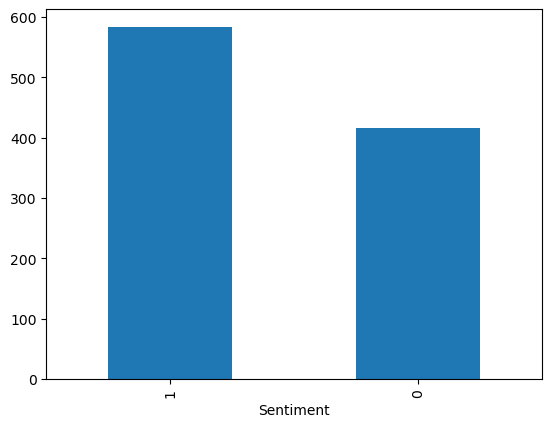

In [14]:
df['Sentiment'].value_counts().plot(kind='bar')


## Theme distribution

<Axes: xlabel='Theme'>

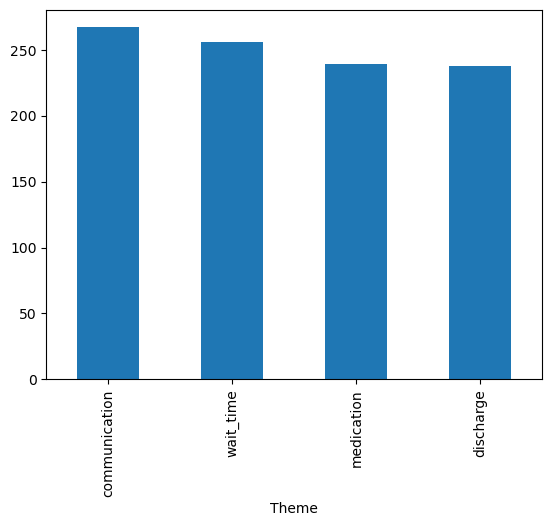

In [15]:
df['Theme'].value_counts().plot(kind='bar')


## Text length analysis

In [16]:
df['text_len'] = df['Feedback'].str.split().apply(len)
df['text_len'].describe()


count    1000.000000
mean        6.224000
std         1.481897
min         4.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: text_len, dtype: float64

## Word cloud

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

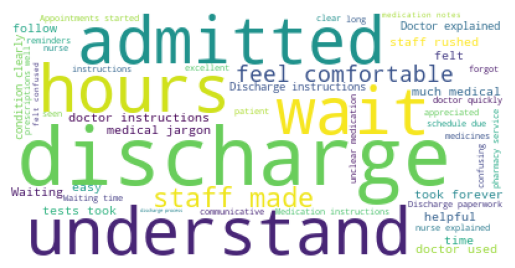

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud().generate(" ".join(df['Feedback']))
plt.imshow(WordCloud(background_color='white').generate(" ".join(df['Feedback'])))
plt.axis('off')


## positive vs negative feedback

In [20]:
df[df['Sentiment']==1].head()
df[df['Sentiment']==0].head()


,Theme,Feedback,Sentiment,Satisfaction,Readmission,text_len
3,discharge,Instructions after discharge were not helpful,0,1,1,6
4,discharge,Instructions after discharge were not helpful,0,2,1,6
5,wait_time,Waiting time was too long,0,1,1,5
8,discharge,Instructions after discharge were not helpful,0,1,0,6
11,wait_time,I had to wait for hours before being admitted,0,1,0,9


## Text Cleaning

In [21]:
import re

df['clean_text'] = df['Feedback'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df['clean_text'] = df['clean_text'].str.lower().str.strip()


## Tokenization + Padding

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer #converts text to integers
from tensorflow.keras.preprocessing.sequence import pad_sequences  #ensures all sequences have the same length 

vocab_size = 2000
max_len = 30

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
#Converting Text to Integer Sequences
sequences = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
y=df['Sentiment'].values

## Train/Val/Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.30,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.50,random_state=42)

## Saving the files

In [27]:
import numpy as np
import pickle

np.save("X_train.npy", X_train)
np.save("X_val.npy", X_val)
np.save("X_test.npy", X_test)

np.save("y_train.npy", y_train)
np.save("y_val.npy", y_val)
np.save("y_test.npy", y_test)

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
print("Preprocessing and saving completed successfully!")

Preprocessing and saving completed successfully!


## Sentimental for bert model

In [28]:
df=pd.read_excel(r"D:\\HealthCare System\\patient_feedback_dataset.xlsx")
df.head(10)

,Theme,Feedback,Sentiment,Satisfaction,Readmission
0,discharge,Discharge instructions were very clear,1,4,1
1,communication,I felt the doctor used too much medical jargon,1,5,0
2,medication,I appreciated the reminders about my medicines,1,4,0
3,discharge,Instructions after discharge were not helpful,0,1,1
4,discharge,Instructions after discharge were not helpful,0,2,1
5,wait_time,Waiting time was too long,0,1,1
6,discharge,Discharge instructions were very clear,1,5,0
7,medication,I appreciated the reminders about my medicines,1,4,0
8,discharge,Instructions after discharge were not helpful,0,1,0
9,medication,The pharmacy service was excellent,1,5,0


## Cleaning the text 

In [29]:
import re

df['clean_text'] = (
    df['Feedback']
    .apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    .str.lower()
    .str.strip()
    .replace('\s+', ' ', regex=True)
)

## Saving the cleaned file with only sentiment and clean_text

In [31]:
df[['clean_text','Sentiment']].to_csv(r"D:\\HealthCare System\\cleaned_feedback_dataset.csv", index=False)